Implementation in Qiskit

Now let's see how we can implement Deutsch's algorithm in Qiskit. We'll start with a version check and then perform the imports required solely for this implementation. For the implementations of other algorithms that follows, we'll perform the required imports separately for the sake of greater modularity.

In [1]:
from qiskit import __version__
 
print(__version__)

2.3.0


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

First we'll define a quantum circuit that implements a query gate for one of the four functions f1,f2,f3 from one bit to one bit described previously. As we already mentioned, the implementation of query gates is not really a part of Deutsch's algorithm itself; here we're essentially just showing one way to prepare the input, in the form of a circuit implementation of a query gate.

In [3]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit
 
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
 
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

We can see what each circuit looks like using the draw method. Here's the circuit for the function 
f3

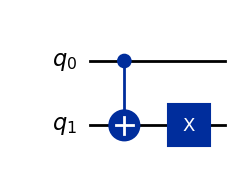

In [4]:
display(deutsch_function(3).draw(output="mpl"))

Next we will create the actual quantum circuit for Deutsch's algorithm, substituting the query gate with a quantum circuit implementation given as an argument. Shortly we'll plug in one of the four circuits defined by the function deutsch_function we defined earlier. Barriers are included to show the visual separation between the query gate implementation and the rest of the circuit.

In [5]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.
 
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
 
    qc.x(n)
    qc.h(range(n + 1))
 
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
 
    qc.h(range(n))
    qc.measure(range(n), range(n))
 
    return qc

Again we can see what the circuit looks like using the draw method.

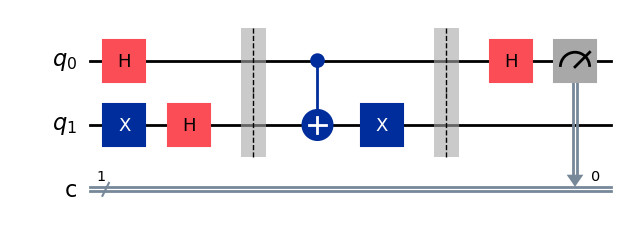

In [6]:
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

Finally, we'll create a function that runs the circuit previously defined one time and outputs the appropriate result: "constant" or "balanced."

In [7]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.
 
    qc = compile_circuit(function)
 
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

We can now run Deutsch's algorithm on any one of the four functions defined above.

In [8]:
f = deutsch_function(3)
display(deutsch_algorithm(f))

'balanced'